ChEn-3170: Computational Methods in Chemical Engineering Fall 2018 UMass Lowell; Prof. V. F. de Almeida **28Nov2018**

# 14. Single Reaction Equilibrium
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\abs}[1]{\left\lvert{#1}\right\rvert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents
* [Introduction](#intro)
* [Algorithm](#algo)
* [Input Data 1](#data1)
 - [Plot Root Function](#prf1)
 - [Plot Root](#pr1)
* [Input Data 2](#data2)
 - [Plot Root Function](#prf2)
 - [Plot Root](#pr2)
---

## Introduction<a id="intro"></a>
Newton's method for computing roots of a single non-linear equation, $f(x)=0$, is described [here](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EpSJc_i2uXtEmSfTsZpdRfwBSYvIcr21wCnBs9XT06SdHw?e=p3QSG6).

The application at hand is to compute the equilibrium molar fraction of species undergoing a reversible reaction

\begin{equation*}
\nu_A\,\text{A} + \nu_B\,\text{B} \overset{K_x}{\longleftrightarrow} \nu_C\,\text{C} + \nu_D\,\text{D}    ,
\end{equation*}

that is, compute $x_A$, $x_B$, $x_C$, $x_D$ for the given stoichiometry and molar equilibrium reaction constant $K_x$. Note that this information is not sufficient for computing the equilibrium molar fraction. In addition, it is required that the molar fraction of **any three species is known** at some point in time or as a reference, say $x_{A_0}$, and $x_{B_0}$; note $x_{A_0} + x_{B_0} + x_{C_0} = 1$.


## Algorithm<a id="algo"></a>

Given $f(\cdot)$, find the roots 

\begin{equation*}
f(x) = 0 ,
\end{equation*}

using an iterative method based on the initial guess $x_0$. Compute the updates

\begin{equation*}
\delta x_k = - \frac{f(x_{k-1})}{f'(x_{k-1})} \ \qquad \  \forall \ \qquad \ k = 1,\ldots,k_\text{max} , 
\end{equation*}

then compute the approximation to the root

\begin{equation*}
 x_k = x_{k-1} + \delta x_k \ \qquad \  \forall \ \qquad\ \ k = 1,\ldots,k_\text{max} ,
\end{equation*}

until convergence, say, $\abs{x_k} \le 10^{-8}$ and $\abs{f(x_k)} \le 10^{-8}$, or no convergence achieved , say $k>k_\text{max}$. 

## Input Data 1<a id="data1"></a>

Reversible reaction: A + B <=> C 

Name                        | Parameter    | Value                | Unit              |
----------------------------|--------------|----------------------|-------------------| 
initial mole fraction of A  | $x_{A_0}$     | 0.5                   |               | 
initial mole fraction of B  | $x_{B_0}$     | 0.5                  | | 
initial mole fraction of C  | $x_{C_0}$     | 0.0                  | | 
initial mole fraction of C  | $x_{D_0}$     | 0.0                  | | 
mole equilibrium constant   | $K_\text{x}$ | 180                  |              | 

In [29]:
'''Parameters for chemical equilibrium of A + B <-> C + D'''

x_a_0 = 0.5
x_b_0 = 0.5
x_c_0 = 0.0
x_d_0 = 0.0

species_names = ['A','B','C','D']

import numpy as np
stoic_row = np.array([-0.7, -1.3, 1.7, 0.5])

reaction =  str(-stoic_row[0])+' A + '+str(-stoic_row[1])+' B '\
           +' <=> '\
           +str(stoic_row[2])+' C + '+str(stoic_row[3])+' D '

x_vec_0 = np.array([x_a_0, x_b_0, x_c_0, x_d_0])

assert abs(np.sum(x_vec_0) - 1.0) <= 1e-12
assert np.all(x_vec_0 >=0.0)

eq_kx_cte = 108.0

print('reaction: ',reaction)

reaction:  0.7 A + 1.3 B  <=> 1.7 C + 0.5 D 


In [30]:
'''Molar fractions function'''

def molar_fractions( ext_hat, x_vec_0, stoic_row):
    
    assert abs(x_vec_0.sum()-1.0) <= 1e-10
    assert abs( 1.0 + ext_hat * stoic_row.sum() ) >= 1e-8
    
    x_vec = ( x_vec_0 + ext_hat * stoic_row ) / ( 1.0 + ext_hat * stoic_row.sum() )
    
    return x_vec

In [54]:
'''Derivative of the molar fractions funtio wrt normalized extent of reaction'''

def d_ext_molar_fractions( ext_hat, x_vec_0, stoic_row ):
    
    dext_x_vec = ( stoic_row - x_vec_0 * stoic_row.sum() ) / ( 1.0 + ext_hat * stoic_row.sum() )**2
    
    return dext_x_vec

In [32]:
'''Equilibrium function'''

def keq_function( x_vec, eq_kx_cte, stoic_row ):
    
    value = eq_kx_cte - x_vec[0]**stoic_row[0] * x_vec[1]**stoic_row[1] \
                        * x_vec[2]**stoic_row[2] * x_vec[3]**stoic_row[3]
    
    return value

In [33]:
'''Gradient with respect to molar fractions of the equilibrium function'''
def grad_x_k_function( x_vec, eq_kx_cte, stoic_row ):
        
    if abs(x_vec.prod()) <= 1e-8:
        x_vec += 1e-8
        
    x_vec_inv = 1.0/x_vec
    
    import numpy as np
    grad_vec = -eq_kx_cte * stoic_row*x_vec_inv
    
    return grad_vec

In [59]:
'''Function: plot equilibrium function'''

def plot_function( ex_min, ex_max, n_pts,
                   x_vec_0, eq_kx_cte, stoic_row,
                   ext_hat_root=None  ):
    
    import matplotlib.pyplot as plt
    plt.figure(1, figsize=(6, 6))
    
    import numpy as np
    ex_vec = np.linspace(ex_min, ex_max, n_pts)
    
    keq_function_values = list()
    for e in ex_vec:
        x_vec = molar_fractions( e, x_vec_0, stoic_row ) 
        keq_function_values.append( keq_function( x_vec, eq_kx_cte, stoic_row) ) 
    
    plt.plot(ex_vec, keq_function_values,'b-',label='$K_{eq}$')
    
    plt.xlabel(r'$\hat{\epsilon}$',fontsize=18)
    plt.ylabel(r'$f_{eq}(\hat{\epsilon})$',fontsize=18)
    plt.title(reaction,fontsize=20)
    #plt.legend(loc='best',fontsize=12)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    (x_min,x_max) = plt.xlim()
    dx = abs(x_max-x_min)
    x_text = (x_max+x_min)/2
    
    (y_min,y_max) = plt.ylim()
    dy = abs(y_max-y_min)
    y_text = y_max - dy*0.05
    
    for x,spc in zip(x_vec_0,species_names):
        
        plt.text(x_text, y_text, 'x_%s_0=%8.2e'%(spc,x),fontsize=16)
        y_text -= dy*0.06
        #plt.text(x_text, y_text, r'$x_{B_0}=$%8.2e'%x_vec_0[1],fontsize=16)
        #y_text -= dy*0.06
        #plt.text(x_text, y_text, r'$x_{C_0}=$%8.2e'%x_vec_0[2],fontsize=16)
    
    y_text -= dy*0.06
    plt.text(x_text, y_text, r'$K_x=$%8.2e'%eq_kx_cte,fontsize=16)
    
    
    if ext_hat_root is not None:
        
        plt.plot(ext_hat_root, 0.0,'r*',label='root',markersize=14)
               
        (x_min,x_max) = plt.xlim()
        dx = abs(x_max-x_min)
        x_text = ext_hat_root + dx*0.01
    
        (y_min,y_max) = plt.ylim()
        dy = abs(y_max-y_min)
        y_text = 0.0 + dy*0.01
    
        plt.text(x_text, y_text, r'$\hat{\epsilon}^*=$%8.2e'%ext_hat_root,fontsize=16)
    
    
    plt.grid(True)
    plt.show()
    print('')
    
    return

### Plot Root Function<a id="prf1"></a>

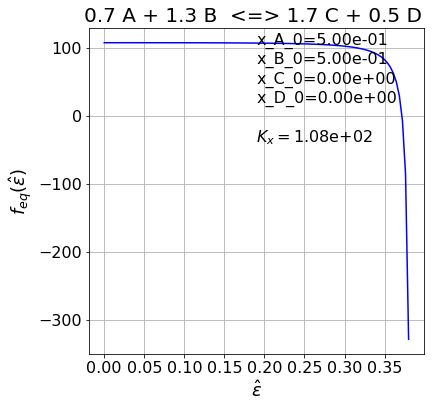

In [60]:
'''Plot equilibrium function'''

ext_hat_min = 0.0
ext_hat_max = 0.38
n_pts = 100
plot_function( ext_hat_min, ext_hat_max, n_pts, 
               x_vec_0, eq_kx_cte, stoic_row )

In [62]:
"""Newton's method"""

def newton_solve( x_vec_0, eq_kx_cte, stoic_row,
                  ext_hat_0=0.0, k_max=30, tolerance=1.0e-10, verbose=True ):

    # Other initialization
    delta_k = 1e+10
    f_k     = 1e+10
    ext_hat = ext_hat_0

    if verbose is True:
        print('\n')
        print('******************************************************')
        print("          Newton's Method Iterations                  ")
        print('******************************************************')
        print("k |  f(e_k)  |  f'(e_k) | |del e_k| |    e_k   |convg|")
        print('------------------------------------------------------')

    import math
    k = 0
    
    while (abs(delta_k) > tolerance or abs(f_k) > tolerance) and k <= k_max:
        
        x_vec = molar_fractions( ext_hat, x_vec_0, stoic_row ) 
        f_k   = keq_function( x_vec, eq_kx_cte, stoic_row )
        
        grad_x_K = grad_x_k_function( x_vec, eq_kx_cte, stoic_row )
        
        d_ext_x = d_ext_molar_fractions( ext_hat, x_vec_0, stoic_row )
            
        f_prime_k = grad_x_K @ d_ext_x
            
        delta_k_old = delta_k
        delta_k = -f_k / f_prime_k
        
        ext_hat += delta_k
        
        if k > 0:
            if delta_k != 0.0 and delta_k_old != 0.0:
                convergence_factor = math.log(abs(delta_k),10) / math.log(abs(delta_k_old),10)
            else:
                convergence_factor = 0.0  
        else:
            convergence_factor = 0.0
            
        k = k + 1
        
        if verbose is True:
            print('%2i %+5.3e %+5.3e %+5.3e  %+5.3e %5.2f'%\
                  (k,f_k,f_prime_k,abs(delta_k),ext_hat,convergence_factor))

    if verbose is True:
        print('******************************************************') 
        print('Root = %8.5e'%ext_hat)
    
    return ext_hat

In [ ]:
'''Find root and equilibrium molar fractions'''

ext_hat_0 = 0.0
k_max = 20
tolerance = 1.0e-8

ext_hat = newton_solve( x_vec_0, eq_kx_cte, stoic_row,
                        ext_hat_0, k_max, tolerance )

x_a = (x_a_0 - ext_hat)/(1.0-ext_hat)
x_b = (x_b_0 - ext_hat)/(1.0-ext_hat)
x_c = (x_c_0 + ext_hat)/(1.0-ext_hat)

assert x_a_0 >= 0. and x_b_0 >= 0. and x_c_0 >= 0.
assert abs(x_a + x_b + x_c - 1.0) <= 1e-12
assert abs(x_c/x_a/x_b - eq_kx_cte) <= 1e-4,'%r'%(abs(x_c/x_a/x_b - eq_kx_cte))

print('')
print('Equilibrium mole fractions:\n')
print('x_a = %5.3e\n'%x_a)
print('x_b = %5.3e\n'%x_b)
print('x_c = %5.3e\n'%x_c)

### Plot Root 1<a id="prf11"></a>

In [ ]:
'''Plot equilibrium function with root'''

ext_hat_min = 0.0
ext_hat_max = 1.0
n_pts = 100
plot_function( ext_hat_min, ext_hat_max, n_pts, x_a_0, x_b_0, x_c_0, eq_kx_cte, ext_hat )

## Input Data 2<a id="data2"></a>

Reversible reaction: A + B <=> C 

Name                        | Parameter    | Value                | Unit              |
----------------------------|--------------|----------------------|-------------------| 
initial mole fraction of A  | $x_{A0}$     | 0.5                   |               | 
initial mole fraction of B  | $x_{B0}$     | 0.2                  | | 
initial mole fraction of C  | $x_{C0}$     | 0.3                  | | 
mole equilibrium constant   | $K_\text{x}$ | 180                  |              | 

In [ ]:
'''Parameters for chemical equilibrium of A + B <-> C'''

x_a_0     = 0.5
x_b_0     = 0.2
x_c_0     = 0.3

assert abs(x_a_0 + x_b_0 + x_c_0 - 1.0) <= 1e-12
assert x_a_0 >= 0. and x_b_0 >= 0. and x_c_0 >= 0.

eq_kx_cte = 108.0

print('Max. ext_hat = %5.2f'%min(x_a_0,x_b_0))

### Plot Root Function<a id="prf2"></a>

In [ ]:
'''Plot equilibrium function'''

ext_hat_min = 0.0
ext_hat_max = 1.0
n_pts = 100
plot_function( ext_hat_min, ext_hat_max, n_pts, x_a_0, x_b_0, x_c_0, eq_kx_cte )

In [ ]:
'''Find root and equilibrium molar fractions'''

ext_hat_0 = 0.0
k_max = 20
tolerance = 1.0e-8

ext_hat = newton_solve( x_a_0, x_b_0, x_c_0, eq_kx_cte,
                        ext_hat_0,k_max,tolerance )

x_a = (x_a_0 - ext_hat)/(1.0-ext_hat)
x_b = (x_b_0 - ext_hat)/(1.0-ext_hat)
x_c = (x_c_0 + ext_hat)/(1.0-ext_hat)

assert x_a_0 >= 0. and x_b_0 >= 0. and x_c_0 >= 0.
assert abs(x_a + x_b + x_c - 1.0) <= 1e-12
assert abs(x_c/x_a/x_b - eq_kx_cte) <= 1e-10,'%r'%(abs(x_c/x_a/x_b - eq_kx_cte))

print('')
print('Equilibrium mole fractions:\n')
print('x_a = %5.3e\n'%x_a)
print('x_b = %5.3e\n'%x_b)
print('x_c = %5.3e\n'%x_c)

### Plot Root 1<a id="prf21"></a>

In [ ]:
'''Plot equilibrium function with root'''

ext_hat_min = 0.0
ext_hat_max = 1.0
n_pts = 100
plot_function( ext_hat_min, ext_hat_max, n_pts, x_a_0, x_b_0, x_c_0, eq_kx_cte, ext_hat )

## Inverse Problem (Forensics and Reverse Engineering)<a id="inv"></a>
Someone is interested in the answers to the questions:

1. If we know $x_A$, $x_B$ and $x_C$, could a unique $x_{A_0} , x_{B_0}, x_{C_0}$ be computed? if not unique, how many exist?
2. What could we say about $x_{A_0} , x_{B_0}, x_{C_0}$?

In [ ]:
'''Let us compute an equilibrium molar fraction'''

x_a_0 = 0.34
x_b_0 = 0.64
x_c_0 = 0.02

assert abs(x_a_0 + x_b_0 + x_c_0 - 1.0) <= 1e-12
assert x_a_0 >= 0. and x_b_0 >= 0. and x_c_0 >= 0.

eq_kx_cte = 56.8 #108.0

print('Max. ext_hat = %5.2f'%min(x_a_0,x_b_0))

In [ ]:
'''Find root and the "gold" equilibrium molar fractions'''

ext_hat_0 = 0.0
k_max = 20
tolerance = 1.0e-8

ext_hat = newton_solve( x_a_0, x_b_0, x_c_0, eq_kx_cte,
                        ext_hat_0,k_max,tolerance )

x_a_gold = (x_a_0 - ext_hat)/(1.0-ext_hat)
x_b_gold = (x_b_0 - ext_hat)/(1.0-ext_hat)
x_c_gold = (x_c_0 + ext_hat)/(1.0-ext_hat)

assert x_a_gold > 0. and x_b_gold > 0. and x_c_gold >= 0.
assert abs(x_a_gold + x_b_gold + x_c_gold - 1.0) <= 1e-12
assert abs(x_c_gold/x_a_gold/x_b_gold - eq_kx_cte) <= 1e-12,'%r'%(abs(x_c_gold/x_a_gold/x_b_gold - eq_kx_cte)) 

print('')
print('Equilibrium mole fractions:\n')
print('x_a_gold = %5.3e\n'%x_a_gold)
print('x_b_gold = %5.3e\n'%x_b_gold)
print('x_c_gold = %5.3e\n'%x_c_gold)

In [ ]:
'''Find the reference molar fractions'''

try:
    from chen_3170.toolkit import magic_molar_fractions
except ModuleNotFoundError:
    assert False, 'You need to provide your own forensics function here. Bailing out.'

(x_a_0,x_b_0,x_c_0) = magic_molar_fractions( x_a_gold, x_b_gold, x_c_gold )

print('x_a_0 = %5.3e\n'%x_a_0)
print('x_b_0 = %5.3e\n'%x_b_0)
print('x_c_0 = %5.3e\n'%x_c_0)

assert abs(x_a_0 + x_b_0 + x_c_0 - 1.0) <= 1e-12
assert x_a_0 >= 0. and x_b_0 >= 0. and x_c_0 >= 0.

print('Max. ext_hat = %5.2f'%min(x_a_0,x_b_0))

In [ ]:
'''Plot equilibrium function'''

ext_hat_min = 0.0
ext_hat_max = 1.0
n_pts = 100
plot_function( ext_hat_min, ext_hat_max, n_pts, x_a_0, x_b_0, x_c_0, eq_kx_cte )

In [ ]:
'''Find root and equilibrium molar fractions'''

ext_hat_0 = 0.0
k_max = 20
tolerance = 1.0e-8

ext_hat = newton_solve( x_a_0, x_b_0, x_c_0, eq_kx_cte,
                        ext_hat_0,k_max,tolerance )

x_a = (x_a_0 - ext_hat)/(1.0-ext_hat)
x_b = (x_b_0 - ext_hat)/(1.0-ext_hat)
x_c = (x_c_0 + ext_hat)/(1.0-ext_hat)

assert x_a_0 >= 0. and x_b_0 >= 0. and x_c_0 >= 0.
assert abs(x_a + x_b + x_c - 1.0) <= 1e-12
assert abs(x_c/x_a/x_b - eq_kx_cte) <= 1e-10,'%r'%(abs(x_c/x_a/x_b - eq_kx_cte))

print('')
print('Equilibrium mole fractions:\n')
print('x_a = %5.3e\n'%x_a)
print('x_b = %5.3e\n'%x_b)
print('x_c = %5.3e\n'%x_c)

assert abs(x_a-x_a_gold) + abs(x_b-x_b_gold) + abs(x_c-x_c_gold) <= 1e-12

In [ ]:
'''Function: reference states'''

def plot_ref_states( x_a_0, x_b_0, x_c_0,
                     x_a, x_b, x_c ):
    
    import matplotlib.pyplot as plt
    
    plt.figure(1, figsize=(15, 6))
    
    plt.subplot(121) 
    
    plt.plot(x_a_0, x_b_0,'b*',markersize=14)
    
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel(r'$x_{A_0}$',fontsize=18)
    plt.ylabel(r'$x_{B_0}$',fontsize=18)
    plt.title('Reference',fontsize=20)   
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    
    plt.subplot(122)
    plt.plot(x_a, x_b,'go',markersize=14)
    
    plt.xlim(0,1)
    plt.ylim(0,1)  
    plt.xlabel(r'$x_{A}$',fontsize=18)
    plt.ylabel(r'$x_{B}$',fontsize=18)
    plt.title('Gold Equilibrium',fontsize=20)  
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    
    plt.show()
    print('')
    
    return

In [ ]:
'''Plot reference state'''

plot_ref_states( x_a_0, x_b_0, x_c_0, x_a_gold, x_b_gold, x_c_gold )

In [ ]:
'''Let us do this one more time'''

import numpy as np
x_0 = np.zeros((3,2))

x_0[:,0] = np.array([x_a_0,x_b_0,x_c_0]) # save previous reference molar fractions

(x_a_0,x_b_0,x_c_0) = magic_molar_fractions( x_a_gold, x_b_gold, x_c_gold )

ext_hat = newton_solve( x_a_0, x_b_0, x_c_0, eq_kx_cte,
                        ext_hat_0,k_max,tolerance )

x_a = (x_a_0 - ext_hat)/(1.0-ext_hat)
x_b = (x_b_0 - ext_hat)/(1.0-ext_hat)
x_c = (x_c_0 + ext_hat)/(1.0-ext_hat)

assert abs(x_a-x_a_gold) + abs(x_b-x_b_gold) + abs(x_c-x_c_gold) <= 1e-12

x_0[:,1] = np.array([x_a_0,x_b_0,x_c_0])

plot_ref_states( x_0[0,:], x_0[1,:], x_0[2,:], x_a_gold, x_b_gold, x_c_gold )

**Could a unique $x_{A_0} , x_{B_0}, x_{C_0}$ be computed? No.** <br>
**If not unique, how many exist? ** <br>

**So is it hopeless? or can we say something about the reference molar fractions?**

In [ ]:
'''Plot reference states'''

npts = 120

import numpy as np
x_0  = np.zeros((3,npts))
x_eq = np.zeros((3,npts))

for i in range(npts):
    
    (x_a_0,x_b_0,x_c_0) = magic_molar_fractions( x_a_gold, x_b_gold, x_c_gold )
    
    x_0[0,i] = x_a_0
    x_0[1,i] = x_b_0
    x_0[2,i] = x_c_0
    
    ext_hat = newton_solve( x_a_0, x_b_0, x_c_0, eq_kx_cte,
                            ext_hat_0,k_max, tolerance, verbose=False )
    
    x_eq[0,i] = (x_a_0 - ext_hat)/(1.0-ext_hat)
    x_eq[1,i] = (x_b_0 - ext_hat)/(1.0-ext_hat)
    x_eq[2,i] = (x_c_0 + ext_hat)/(1.0-ext_hat)
    
plot_ref_states( x_0[0,:], x_0[1,:], x_0[2,:], x_eq[0,:], x_eq[1,:], x_eq[2,:] )